In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from warnings import filterwarnings
filterwarnings("ignore")

%matplotlib inline

In [36]:
data = pd.read_csv("LBW_Dataset.csv")
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data.head()

,community,age,weight,delivery_phase,hb,ifa,bp,education,residence,result
0,1,21.0,42.0,1.0,9.2,1,1.375,5.0,1.0,0
1,1,21.0,NaN,1.0,8.8,1,1.500,5.0,1.0,0
2,1,21.0,NaN,1.0,9.2,1,2.125,5.0,1.0,0
3,1,21.0,NaN,1.0,8.0,1,1.375,5.0,1.0,0
4,1,24.0,33.0,1.0,9.3,1,1.571,5.0,1.0,0


In [38]:
print("no of rows with label 1 : ", sum(data.result == 1))
print("no of rows with label 0 : ", sum(data.result == 0))

no of rows with label 1 :  72
no of rows with label 0 :  24


count    89.000000
mean     23.752809
std       3.321011
min      17.000000
25%      21.000000
50%      24.000000
75%      26.000000
max      38.000000
Name: age, dtype: float64

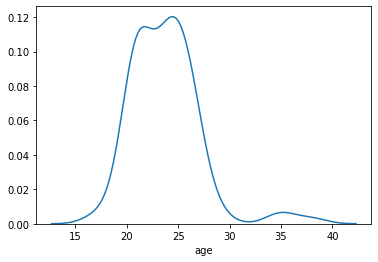

In [39]:
age = data[np.isfinite(data['age'])]
sns.distplot(age['age'], hist = False, kde = True)
data['age'].describe()

count    85.000000
mean     45.129412
std       8.215532
min      30.000000
25%      40.000000
50%      43.000000
75%      50.000000
max      65.000000
Name: weight, dtype: float64

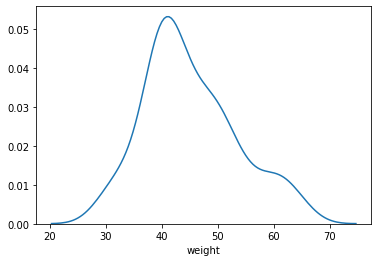

In [41]:
weight = data[np.isfinite(data['weight'])]
sns.distplot(weight['weight'], hist = False, kde = True)
data['weight'].describe()

count    81.000000
mean      1.725189
std       1.449447
min       1.200000
25%       1.375000
50%       1.500000
75%       1.661538
max      13.875000
Name: bp, dtype: float64

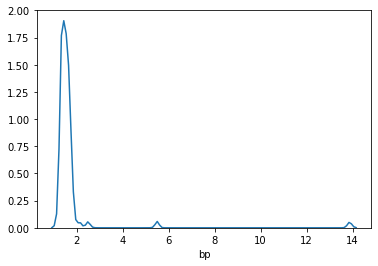

In [42]:
bp = data[np.isfinite(data['bp'])]
sns.distplot(bp['bp'], hist = False, kde = True)
data['bp'].describe()

In [43]:
print(data.shape)

(96, 10)


In [44]:
data1 = data[data['result'] == 1]
data2 = data[data['result'] == 0]

In [45]:
data1.is_copy = 0
data2.is_copy = 0
data1['weight'].fillna((data1['weight'].mean()), inplace=True)
data1['age'].fillna((data1['age'].mean()), inplace=True)
data1['hb'].fillna((data1['hb'].mean()), inplace=True)
data1['bp'].fillna((data1['bp'].median()), inplace=True)
data2['weight'].fillna((data2['weight'].mean()), inplace=True)
data2['age'].fillna((data2['age'].mean()), inplace=True)
data2['hb'].fillna((data2['hb'].mean()), inplace=True)
data2['bp'].fillna((data2['bp'].median()), inplace=True)

In [46]:
data1.head()

,community,age,weight,delivery_phase,hb,ifa,bp,education,residence,result
24,1,24.000000,49.0,1.0,8.9,1,1.333333,5.0,1.0,1
25,1,23.731343,40.0,1.0,8.7,1,1.714286,5.0,1.0,1
26,1,24.000000,40.0,1.0,9.5,1,1.714286,5.0,1.0,1
27,1,26.000000,45.0,1.0,9.0,1,1.375000,5.0,1.0,1
28,1,24.000000,48.0,1.0,9.6,1,1.571429,5.0,1.0,1


In [47]:
data1 = data1.fillna(data1['delivery_phase'].value_counts().index[0])
data1 = data1.fillna(data1['community'].value_counts().index[0])
data1 = data1.fillna(data1['education'].value_counts().index[0])
data1 = data1.fillna(data1['residence'].value_counts().index[0])
data1 = data1.fillna(data1['ifa'].value_counts().index[0])
data2 = data2.fillna(data2['delivery_phase'].value_counts().index[0])
data2 = data2.fillna(data2['community'].value_counts().index[0])
data2 = data2.fillna(data2['education'].value_counts().index[0])
data2 = data2.fillna(data2['residence'].value_counts().index[0])
data2 = data2.fillna(data2['ifa'].value_counts().index[0])

In [48]:
data2.head()

,community,age,weight,delivery_phase,hb,ifa,bp,education,residence,result
0,1,21.0,42.0,1.0,9.2,1,1.375,5.0,1.0,0
1,1,21.0,36.0,1.0,8.8,1,1.500,5.0,1.0,0
2,1,21.0,36.0,1.0,9.2,1,2.125,5.0,1.0,0
3,1,21.0,36.0,1.0,8.0,1,1.375,5.0,1.0,0
4,1,24.0,33.0,1.0,9.3,1,1.571,5.0,1.0,0


In [49]:
frames = [data2, data1]
data = pd.concat(frames)

In [50]:
data.isnull().values.any()

False

In [51]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,community,age,weight,delivery_phase,hb,ifa,bp,education,residence,result
community,1.000000,0.040705,0.175934,-0.021390,0.163100,-0.105847,-0.096197,-0.023240,0.118436,0.044823
age,0.040705,1.000000,0.071521,0.034266,0.054562,-0.017109,-0.061697,0.032190,-0.055433,-0.011826
weight,0.175934,0.071521,1.000000,-0.036984,-0.028873,0.168208,0.067100,0.089256,0.325735,0.567980
delivery_phase,-0.021390,0.034266,-0.036984,1.000000,-0.068785,-0.216353,-0.017558,0.026198,-0.057728,-0.084215
hb,0.163100,0.054562,-0.028873,-0.068785,1.000000,-0.037106,-0.063768,0.005697,-0.122183,-0.013350
ifa,-0.105847,-0.017109,0.168208,-0.216353,-0.037106,1.000000,0.026773,0.008073,0.135463,0.181650
bp,-0.096197,-0.061697,0.067100,-0.017558,-0.063768,0.026773,1.000000,0.025653,0.248201,-0.009031
education,-0.023240,0.032190,0.089256,0.026198,0.005697,0.008073,0.025653,1.000000,0.071081,0.172825
residence,0.118436,-0.055433,0.325735,-0.057728,-0.122183,0.135463,0.248201,0.071081,1.000000,0.087882
result,0.044823,-0.011826,0.567980,-0.084215,-0.013350,0.181650,-0.009031,0.172825,0.087882,1.000000


In [53]:
data.to_csv("cleaned_data_PES2201800211.csv")